# Lab 5 - Probability and Simpson’s Paradox
### Indecision Scientists
### Authors: 
  - Laura Phrasavath 
  - Lucas Smith
  - Maria Suresh
  - Srikanth Oruganti

### Date: 11/25/2024

::: callout-important
This is a *Team* Lab, meaning you can and should work with your project team on it.
:::

## Packages

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Introduction

In this lab you'll review and get practice with a variety of concepts, methods, and tools you've encountered thus far, with a focus on misrepresentation and ethics.

## Learning objectives

By the end of the lab, you will...

-   Calculate single event, conditional, and "and" probabilities.
-   Interpret probabilities in the context of the problem.
-   Display a fundamental understanding of Simpson's Paradox.
-   Practice teamwork and collaboration on GitHub.

## Guidelines

As we've discussed in lecture, your plots should include an informative title, axes should be labeled, and careful consideration should be given to aesthetic choices.

::: callout-note
Remember that continuing to develop a sound workflow for reproducible data analysis is important as you complete the lab and other assignments in this course.
There will be periodic reminders in this assignment to remind you to **Run all, commit, and sync** your changes to GitHub.
You should have at least 3 commits with meaningful commit messages by the end of the assignment.
:::

# Getting started

All team members should clone the team GitHub repository for the lab.
Then, one team member should edit the document Markdown cell by adding the team name to the `Team name` field and adding the names of the team members contributing to lab to the `Authors` field.
Hopefully that's everyone, but if someone doesn't contribute during the lab session or throughout the week before the deadline, their name should not be added.
If you have 4 members in your team, you can delete the line for the 5th team member.
Then, this team member should render the document and commit and push the changes.
All others should **not** touch the document at this stage.

``` markdown
# Lab 5 - Probability and Simpson’s Paradox
### Indecision Scientists
### Authors: 
  - Laura Phrasavath
  - Lucas Smith
  - Maria Suresh
  - Srikanth Oruganti
### Date: 11/25/2024
```


# Questions

::: callout-important
Pick another member of the team write the answer to Part 1.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::


## Part 1 - Probability and you

### Question 1

We use probabilities all the time when making decisions.
*As a group*, provide *two* real world examples of when you've used probability to make decisions in your every day life.
Think critically.
Be creative.

- When writing code and estimating if I'm going to create a bug from existing code. I will probably consider factors such as how old the code is, if it's a risky area, how much testing code coverage it has, or if I'm familiar with the code/area.
-  When planning a weekend getaway. I like to take the weather into account, especially for outdoor activities like hiking or going to the beach. I check the forecast and check the weather updates. Based on this, I’ll choose the weekend with better weather to make sure I can enjoy my plans without worrying about rain. I also keep an eye on the forecast as the weekend gets closer, just in case things change.

::: callout-important
After the team member working on Part 1 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 2.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 2 - Risk of coronary heart disease

This data set is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
We want to examine the relationship between various health characteristics and the risk of having heart disease.

### Question 2

Load in the data set called `education-disease` and answer the following questions below.

In [119]:
ed_disease = pd.read_csv("data/education-disease.csv")
ed_disease.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Question 3

How many levels of education are there in these data?
How many levels of disease are there?
**Hint:** The `unique()` function might be helpful.


In [120]:
print(ed_disease['education'].unique())
print(ed_disease['TenYearCHD'].unique())

[ 4.  2.  1.  3. nan]
[0 1]


**Answer:** There are 4 levels of education and 2 levels of coronary heart disease.

### Question 4

Convert the data to a two-way table where each cell is the number of people falling into each combination of Disease and Education.
**Hint:** Use `groupby` and `pivot_table`.
Your answer should be a 4x3 data frame with counts in each cell.


In [121]:
# Version 1 assuming Disease refers to having stroke history, hypertension, and diabetes
counts_v1 = ed_disease.pivot_table(index=['education'], 
                                values=['prevalentStroke', 'prevalentHyp', 'diabetes'], 
                                aggfunc='sum')
counts_v1.index = counts_v1.index.astype(int)
counts_v1

,diabetes,prevalentHyp,prevalentStroke
education,,,
1,60,621,15
2,23,359,7
3,14,179,3
4,9,128,0


In [122]:
# Version 2 only looks at two levels of TenYearCHD per Dr. Chism's clarification in Slack
counts_v2 = ed_disease.groupby(['education','TenYearCHD']).size()
counts_v2_2 = counts_v2.to_frame()
counts_v2_3 = pd.pivot_table(data=counts_v2_2, index='education', values=0, columns='TenYearCHD')
counts_v2_3

TenYearCHD,0,1
education,,
1.0,1397.0,323.0
2.0,1106.0,147.0
3.0,601.0,88.0
4.0,403.0,70.0


Using the summary table you created above, answer the remaining questions.
You do not have to use Python functions for your calculations, you can use Python as a calculator using the values from the summary table.
Make sure to show your work, i.e., instead of reporting just the final answer, use Python to calculate that in a way we can see the counts you've used along the way.


### Question 5

What is the probability of a random individual having high school or GED education and not being high risk for cardiovascular disease?

In [123]:
# Total sample
total = counts_v2_3.to_numpy().sum()

# Probability of HS/GED education and no/low risk of CHD
P_HSAndNoCHD = 1106 / total

print(P_HSAndNoCHD)

0.2674727932285369


**Answer:** The probability of having a HS/GED education and not being high risk for cardiovascular disease is $\approx 0.267$.

### Question 6

What is the probability that a random individual who is already high risk for cardiovascular disease has a college education?

In [124]:
# Probability of high risk of CHD and college education
P_HighCHDCollege = 70 / total

# Probability of high risk of CHD
P_HighCHD = counts_v2_3[1].sum() / total

# Probability of college education given high risk of CHD
P_CollegeGivenHighCHD = P_HighCHDCollege / P_HighCHD

print(P_CollegeGivenHighCHD)

0.11146496815286625


**Answer:** The probability of having a college education given already being at high risk for cardiovascular disease is $\approx 0.111$.

::: callout-important
After the team member working on Part 2 renders, commits, and pushes, another team member should pull their changes and render the document.
Then, they should write the answer to Part 3.
All others should contribute to the discussion but only one person should type up the answer, render the document, commit, and push to GitHub.
All others should **not** touch the document.
:::

## Part 3 - Bike rentals

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic.
You are tasked to investigate the relationship between the temperature outside and the number of bikes rented in the Washington DC area between the years 2011 and 2022.
You will be investigating data for the months June, July, September, and November.

Below is a list of variables and their definitions:

| Variable  | Definition                                                                     |
|------------------|------------------------------------------------------|
| `season`  | Numerical representation of Spring (2), Summer (3), and Fall (4)               |
| `year`    | Numerical representation of 2011 (0) or 2012 (1)                               |
| `month`   | Month in which data were collected                                             |
| `holiday` | Indicator variable for whether data were collected on a holiday (1) or not (0) |
| `weekday` | Numerical representation of day of week                                        |
| `temp`    | Temperature in Celsius                                                         |
| `count`   | Number of bike rentals for that day                                            |

### Question 7

(a) Read in the `bike` data.
    Then, create a scatter plot that investigates the relationship between the number of bikes rented and the temperature outside.
    Include a straight line of best fit to help discuss the discovered relationship.
    Summarize your findings in 2-3 sentences.

(b) Another researcher suggests to look at the relationship between bikes rented and temperature by each of the four months of interest.
    Recreate your plot in part a, and color the points by month.
    Include a straight line for each of the four months to help discuss each month's relationship between bikes rented and temperature.
    In 3-4 sentences, summarize your findings.

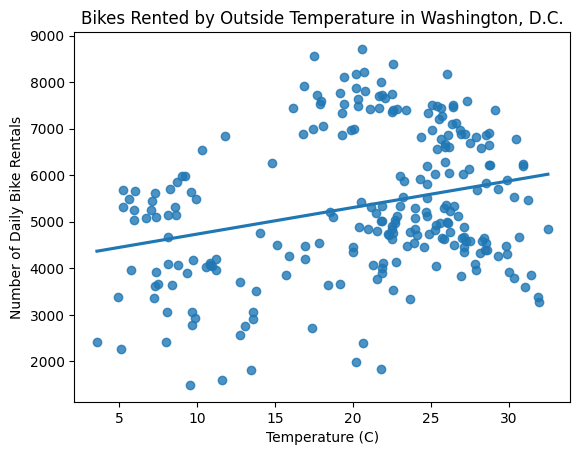

In [125]:
# Code for Question 7(a)
bike = pd.read_csv('data/bike.csv')

sns.regplot(data=bike, x='temp', y='count', ci=None).set(title='Bikes Rented by Outside Temperature in Washington, D.C.')
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Daily Bike Rentals')
plt.show()

**Findings:** While there is significant variation in the number of daily bike rentals for any given outside temperature, the line of best fit indicates a slightly positive relationship. This would mean that as the temperature outside gets warmer, there is a slight increase in the number of bikes rented.

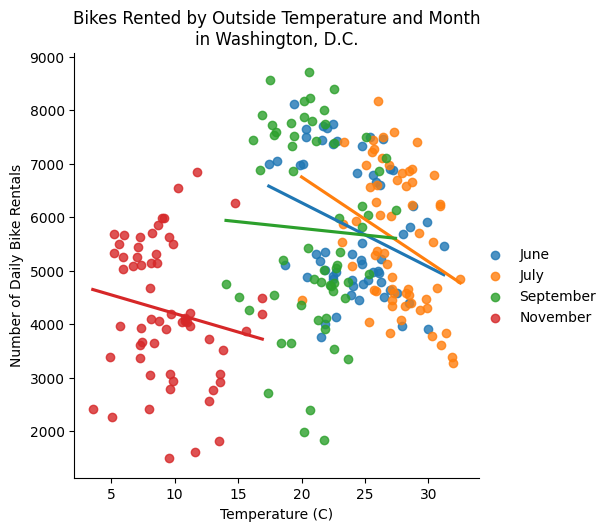

In [126]:
# Code for Question 7(b)
q7b = sns.lmplot(data=bike, x='temp', y='count', ci=None, hue='month').set(title='Bikes Rented by Outside Temperature and Month\nin Washington, D.C.')

month_labels = ['June','July','September','November']
for i, j in zip(q7b._legend.texts, month_labels):
    i.set_text(j)

sns.move_legend(q7b, 'center right', bbox_to_anchor=(1.1,.5), title=None)
plt.xlabel('Temperature (C)')
plt.ylabel('Number of Daily Bike Rentals')
plt.show()

**Findings:** When plotting the same data grouped by month, we now see different trends compared to the plot from Question 7(a). Instead of the best fit lines indicating slightly positive relationships, each month shows negative relationships with the strength of these negative relationships varying by month. In June and July, there are generally more bike rentals. However, higher temperatures are associated with steeper declines in bike rentals. September shows slightly lower bike rentals than the summer months but the decrease of daily rentals does not decrease as drastically when the temperature increases. November with the coldest temperatures out of the months compared generally has the lowest daily bike rentals overall.

Please watch the following video on Simpson's Paradox [here](https://www.youtube.com/watch?v=ebEkn-BiW5k).
After you do, please answer the following questions.

### Question 8

In your own words, summarize Simpson's Paradox in 2-3 sentences.

### Question 9

Compare and contrast your findings from part (a) and part (b).
What's different?

### Question 10

Think critically about your answer to part d.
What other context from this study could be creating this paradox?
That is, identify a potential confounding

# Closing an issue with a commit

Go to your GitHub repository, you will see an issue with the title "Learn to close an issue with a commit".

Your goal is to close this issue with a commit to practice this workflow, which is the workflow you will use when you are addressing feedback on your projects.

-   Go to the relevant section in your lab .ipynb file.
-   Delete the sentence that says "Delete me".
-   Render the document.
-   Commit your changes from the git tab with the commit message *"Delete sentence, closes #1."*
-   Push your changes to your repo and observe that the issue is now closed and the commit associated with this move is linked from the issue.

GitHub allows you to close an issue directly with commits if the commit uses one of the following keywords followed bu the issue number (which you can find next to the issue title): close, closes, closed, fix, fixes, fixed, resolve, resolves, and resolved.


# Wrap-up

## Submission

::: callout-warning
Before you wrap up the assignment, make sure all of your documents are updated on your GitHub repo.
We will be checking these to make sure you have been practicing how to commit and push changes.

You must turn in the .ipynb file by the submission deadline to be considered "on time".
:::

::: callout-important
## Checklist

Make sure you have:

-   attempted all questions
-   run all code in your Jupyter notebook
-   committed and pushed everything to your GitHub repository such that the Git pane in VS Code is empty
:::

## Grading

The lab is graded out of a total of 50 points.

On Questions 1 through 10, you can earn up to 5 points on each question:

-   5: Response shows excellent understanding and addresses all or almost all of the rubric items.

-   4: Response shows good understanding and addresses most of the rubric items.

-   3: Response shows understanding and addresses a majority of the rubric items.

-   2: Response shows effort and misses many of the rubric items.

-   1: Response does not show sufficient effort or understanding and/or is largely incomplete.

-   0: No attempt.
